# **Project: Multi-Class Prediction of Obesity Risk - Classification Techniques**

##### **Reference**: [Walter Reade and Ashley Chow. Multi-Class Prediction of Obesity Risk. https://kaggle.com/competitions/playground-series-s4e2, 2024. Kaggle.]( https://kaggle.com/competitions/playground-series-s4e2)

--- 
## **1. Look the big picture**

- **Objective**: Find the best classification model to predict obesity risk status.
- **Goal**: Minimize the accuracy sccore to improve prediction.
- **Evaluation Metric**: Accuracy.

---
## **2. Get the data**

In [116]:
import warnings

import pandas as pd

warnings.filterwarnings('ignore')

| Feature                          | Description                                                                                                                    |
| -------------------------------- | ------------------------------------------------------------------------------------------------------------------------------ |
| `id`                             | Unique identifier for each person/row. Not useful for modeling.                                                                |
| `Gender`                         | Biological sex (likely "Male" or "Female").                                                                                    |
| `Age`                            | Age of the person (in years).                                                                                                  |
| `Height`                         | Height of the person (likely in meters).                                                                                       |
| `Weight`                         | Weight of the person (likely in kilograms).                                                                                    |
| `family_history_with_overweight` | Whether there is a family history of being overweight (e.g., Yes/No).                                                          |
| `FAVC`                           | Frequent consumption of high-calorie food (e.g., Yes/No). Stands for "Frequent consumption of fast food".                      |
| `FCVC`                           | Frequency of consumption of vegetables (scale 1-3, where higher is better).                                                    |
| `NCP`                            | Number of main meals per day (e.g., 1, 2, 3, or 4).                                                                            |
| `CAEC`                           | Consumption of food between meals (snacking). Categories like "No", "Sometimes", "Frequently", "Always".                       |
| `SMOKE`                          | Whether the person smokes (Yes/No).                                                                                            |
| `CH2O`                           | Daily water consumption in liters (or a scale 1–3).                                                                            |
| `SCC`                            | Calories consumption monitoring (e.g., whether they monitor their calorie intake – Yes/No).                                    |
| `FAF`                            | Frequency of physical activity (hours per week).                                                                               |
| `TUE`                            | Time using technology devices for entertainment (hours per day).                                                               |
| `CALC`                           | Alcohol consumption frequency (e.g., "No", "Sometimes", "Frequently", "Always").                                               |
| `MTRANS`                         | Mode of transportation (e.g., "Walking", "Public Transport", "Bike", "Car").                                                   |
| `NObeyesdad`                     | **Target variable**: Nutritional status / obesity level. Usually categorical: e.g., "Normal\_Weight", "Obesity\_Type\_I", etc. |


In [117]:
df = pd.read_csv("../data/obesity_risk_project/train.csv")

In [118]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


### EDA to find the best split

In [119]:

from sklearn.model_selection import train_test_split

X = df.drop(columns=["id", "NObeyesdad"])
y = df["NObeyesdad"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
) 

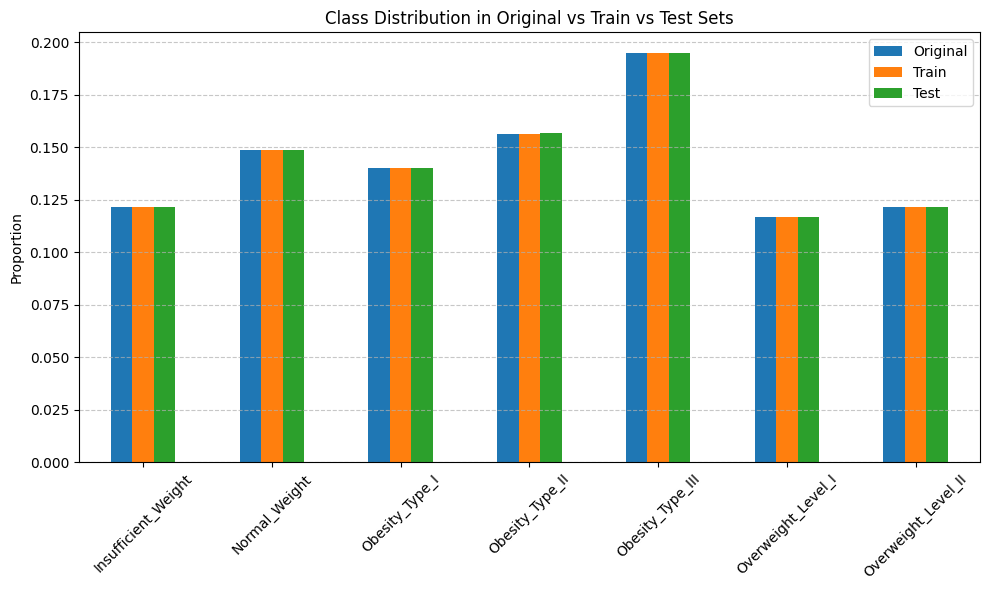

In [120]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert to pandas Series if not already
y_series = pd.Series(y, name="Original")
y_train_series = pd.Series(y_train, name="Train")
y_test_series = pd.Series(y_test, name="Test")

# Combine into one DataFrame for comparison
df_dist = pd.concat([
    y_series.value_counts(normalize=True).rename("Original"),
    y_train_series.value_counts(normalize=True).rename("Train"),
    y_test_series.value_counts(normalize=True).rename("Test")
], axis=1).sort_index()

# Plot the normalized (percentage) distributions
df_dist.plot(kind='bar', figsize=(10,6))
plt.ylabel("Proportion")
plt.title("Class Distribution in Original vs Train vs Test Sets")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [121]:
X_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
4515,Male,22.000000,1.710000,90.000000,yes,yes,2.000000,1.000000,Sometimes,no,2.000000,no,1.000000,2.000000,Sometimes,Public_Transportation
7949,Female,41.000000,1.640000,77.000000,yes,yes,3.000000,1.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Automobile
20677,Male,18.000000,1.800000,56.000000,yes,yes,2.000000,4.000000,Frequently,no,2.000000,no,2.000000,1.000000,no,Automobile
18079,Male,18.000000,1.700000,85.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation
5129,Male,22.735328,1.849425,121.657979,yes,yes,2.352323,2.699971,Sometimes,no,2.357978,no,1.684582,0.739609,Sometimes,Public_Transportation


---
## **3. Explore and visualize the data to gain insights.**

In [122]:
# Look null values
X_train.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [123]:
X_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
4515,Male,22.000000,1.710000,90.000000,yes,yes,2.000000,1.000000,Sometimes,no,2.000000,no,1.000000,2.000000,Sometimes,Public_Transportation
7949,Female,41.000000,1.640000,77.000000,yes,yes,3.000000,1.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Automobile
20677,Male,18.000000,1.800000,56.000000,yes,yes,2.000000,4.000000,Frequently,no,2.000000,no,2.000000,1.000000,no,Automobile
18079,Male,18.000000,1.700000,85.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation
5129,Male,22.735328,1.849425,121.657979,yes,yes,2.352323,2.699971,Sometimes,no,2.357978,no,1.684582,0.739609,Sometimes,Public_Transportation


In [124]:
X_train.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,16606.000000,16606.000000,16606.000000,16606.000000,16606.000000,16606.000000,16606.000000,16606.000000
mean,23.839810,1.699990,87.863797,2.446339,2.757067,2.029559,0.975859,0.616871
std,5.666853,0.087491,26.423177,0.532595,0.708982,0.607527,0.836036,0.601994
min,14.000000,1.450000,39.101805,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631576,66.000000,2.000000,3.000000,1.796294,0.006265,0.000000
50%,22.783646,1.700000,84.064875,2.392665,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762515,111.635463,3.000000,3.000000,2.549617,1.582428,1.000000
max,56.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [125]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16606 entries, 4515 to 7417
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          16606 non-null  object 
 1   Age                             16606 non-null  float64
 2   Height                          16606 non-null  float64
 3   Weight                          16606 non-null  float64
 4   family_history_with_overweight  16606 non-null  object 
 5   FAVC                            16606 non-null  object 
 6   FCVC                            16606 non-null  float64
 7   NCP                             16606 non-null  float64
 8   CAEC                            16606 non-null  object 
 9   SMOKE                           16606 non-null  object 
 10  CH2O                            16606 non-null  float64
 11  SCC                             16606 non-null  object 
 12  FAF                             166

In [126]:
import numpy as np

# Filter only numeric columns
numeric_columns = X_train.select_dtypes(include=np.number).columns

# Calculate the IQR for each numeric column
Q1 = X_train[numeric_columns].quantile(0.25)
Q3 = X_train[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers for each column
outliers_mask = (X_train[numeric_columns] < lower_bound) | (X_train[numeric_columns] > upper_bound)

# Count outliers for each numeric column
outliers_count = outliers_mask.sum()

# Calculate percentage of outliers for each column
total_rows = len(X_train)
outliers_percentage = (outliers_count / total_rows) * 100

# Calculate overall outlier percentage (rows with at least one outlier)
rows_with_outliers = outliers_mask.any(axis=1).sum()
overall_outlier_percentage = (rows_with_outliers / total_rows) * 100

# Display results
print("Count of outliers for each column:")
print(outliers_count)
print("\nPercentage of outliers for each column:")
print(outliers_percentage.round(2))
print(f"\nOverall percentage of rows with at least one outlier: {overall_outlier_percentage:.2f}%")


Count of outliers for each column:
Age        849
Height       3
Weight       0
FCVC         0
NCP       4856
CH2O         0
FAF          0
TUE          0
dtype: int64

Percentage of outliers for each column:
Age        5.11
Height     0.02
Weight     0.00
FCVC       0.00
NCP       29.24
CH2O       0.00
FAF        0.00
TUE        0.00
dtype: float64

Overall percentage of rows with at least one outlier: 32.46%


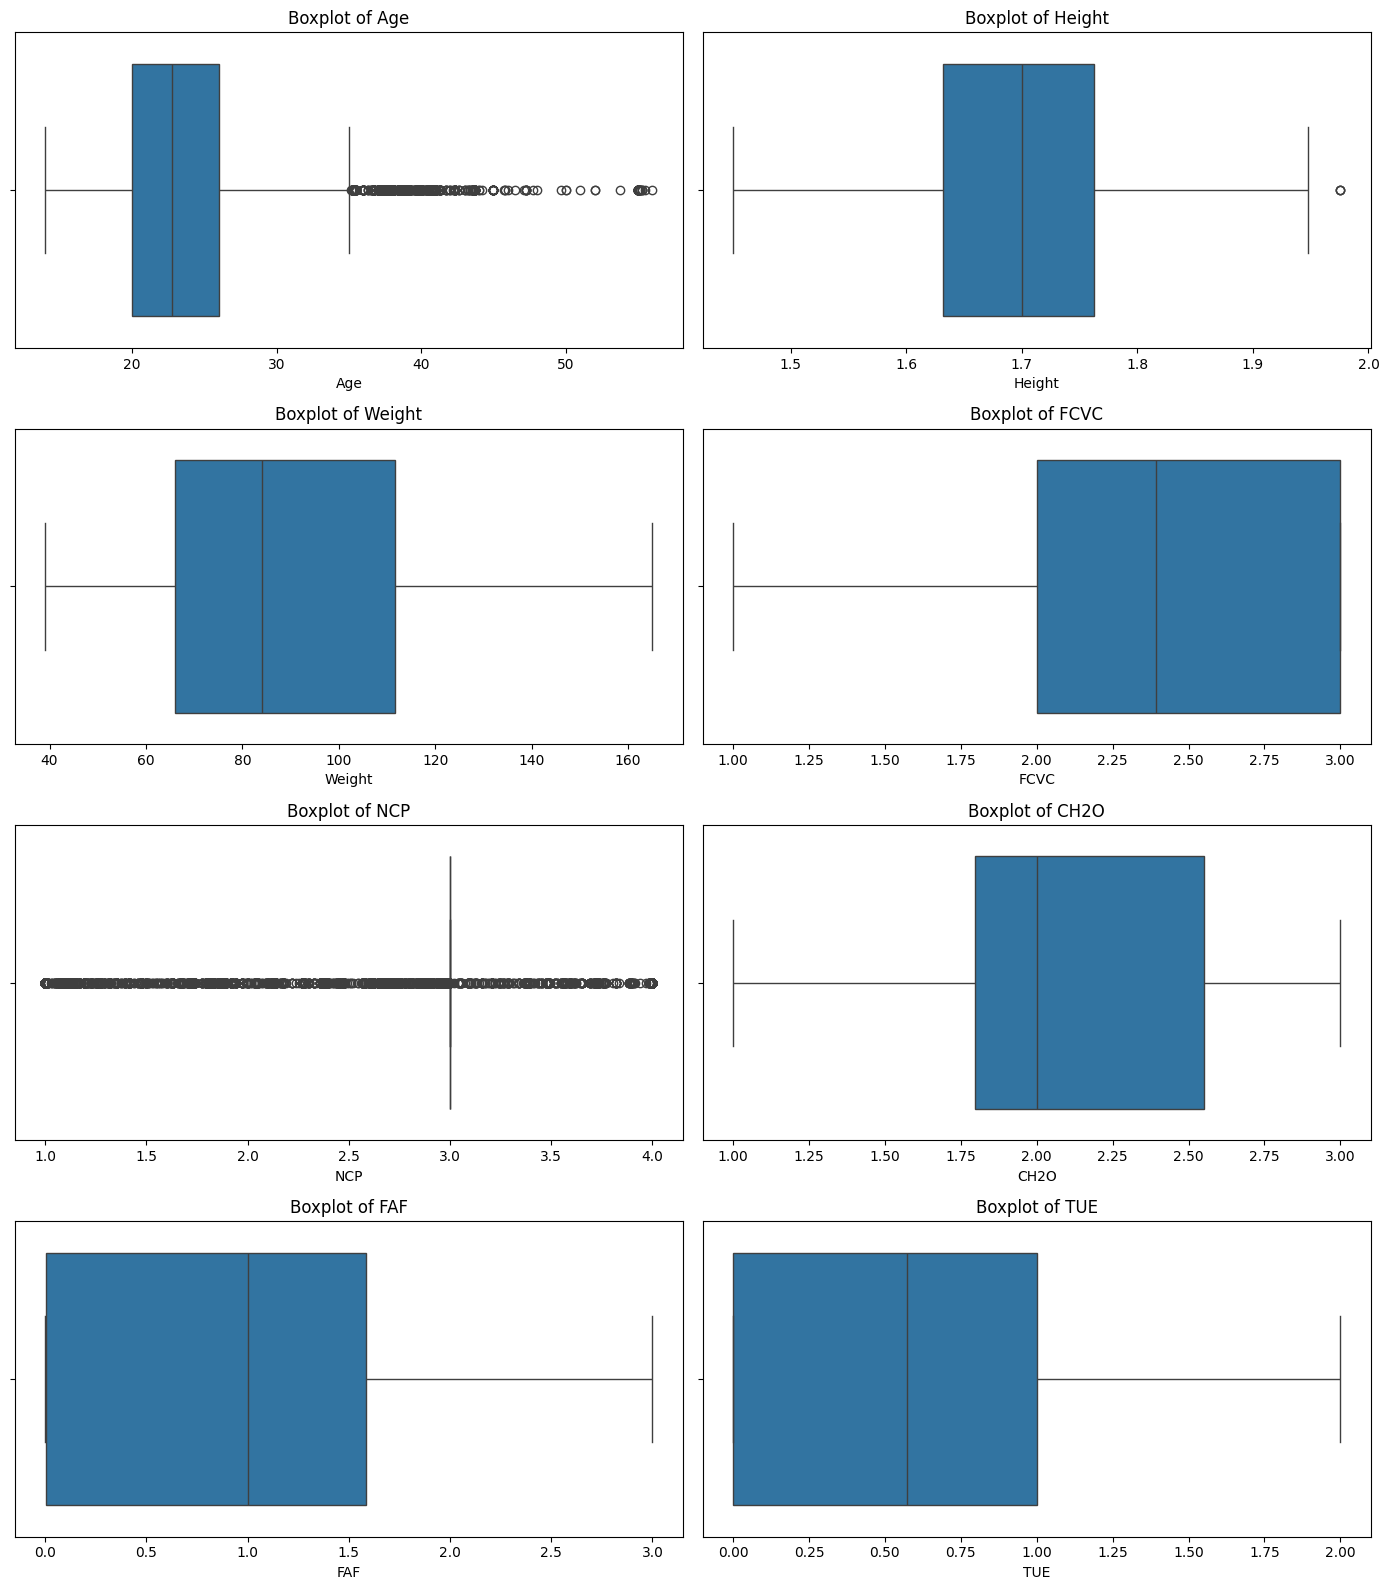

In [127]:
import math

import matplotlib.pyplot as plt
import seaborn as sns

# Graph to see more clear the outliers in two columns
# Set number of columns
num_cols = 2
num_plots = len(numeric_columns)
num_rows = math.ceil(num_plots / num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, num_rows * 4))
axes = axes.flatten()  # Flatten in case it's a 2D array

# Plot each boxplot
for idx, col in enumerate(numeric_columns):
    sns.boxplot(x=X_train[col], ax=axes[idx])
    axes[idx].set_title(f'Boxplot of {col}')

# Hide any unused axes
for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

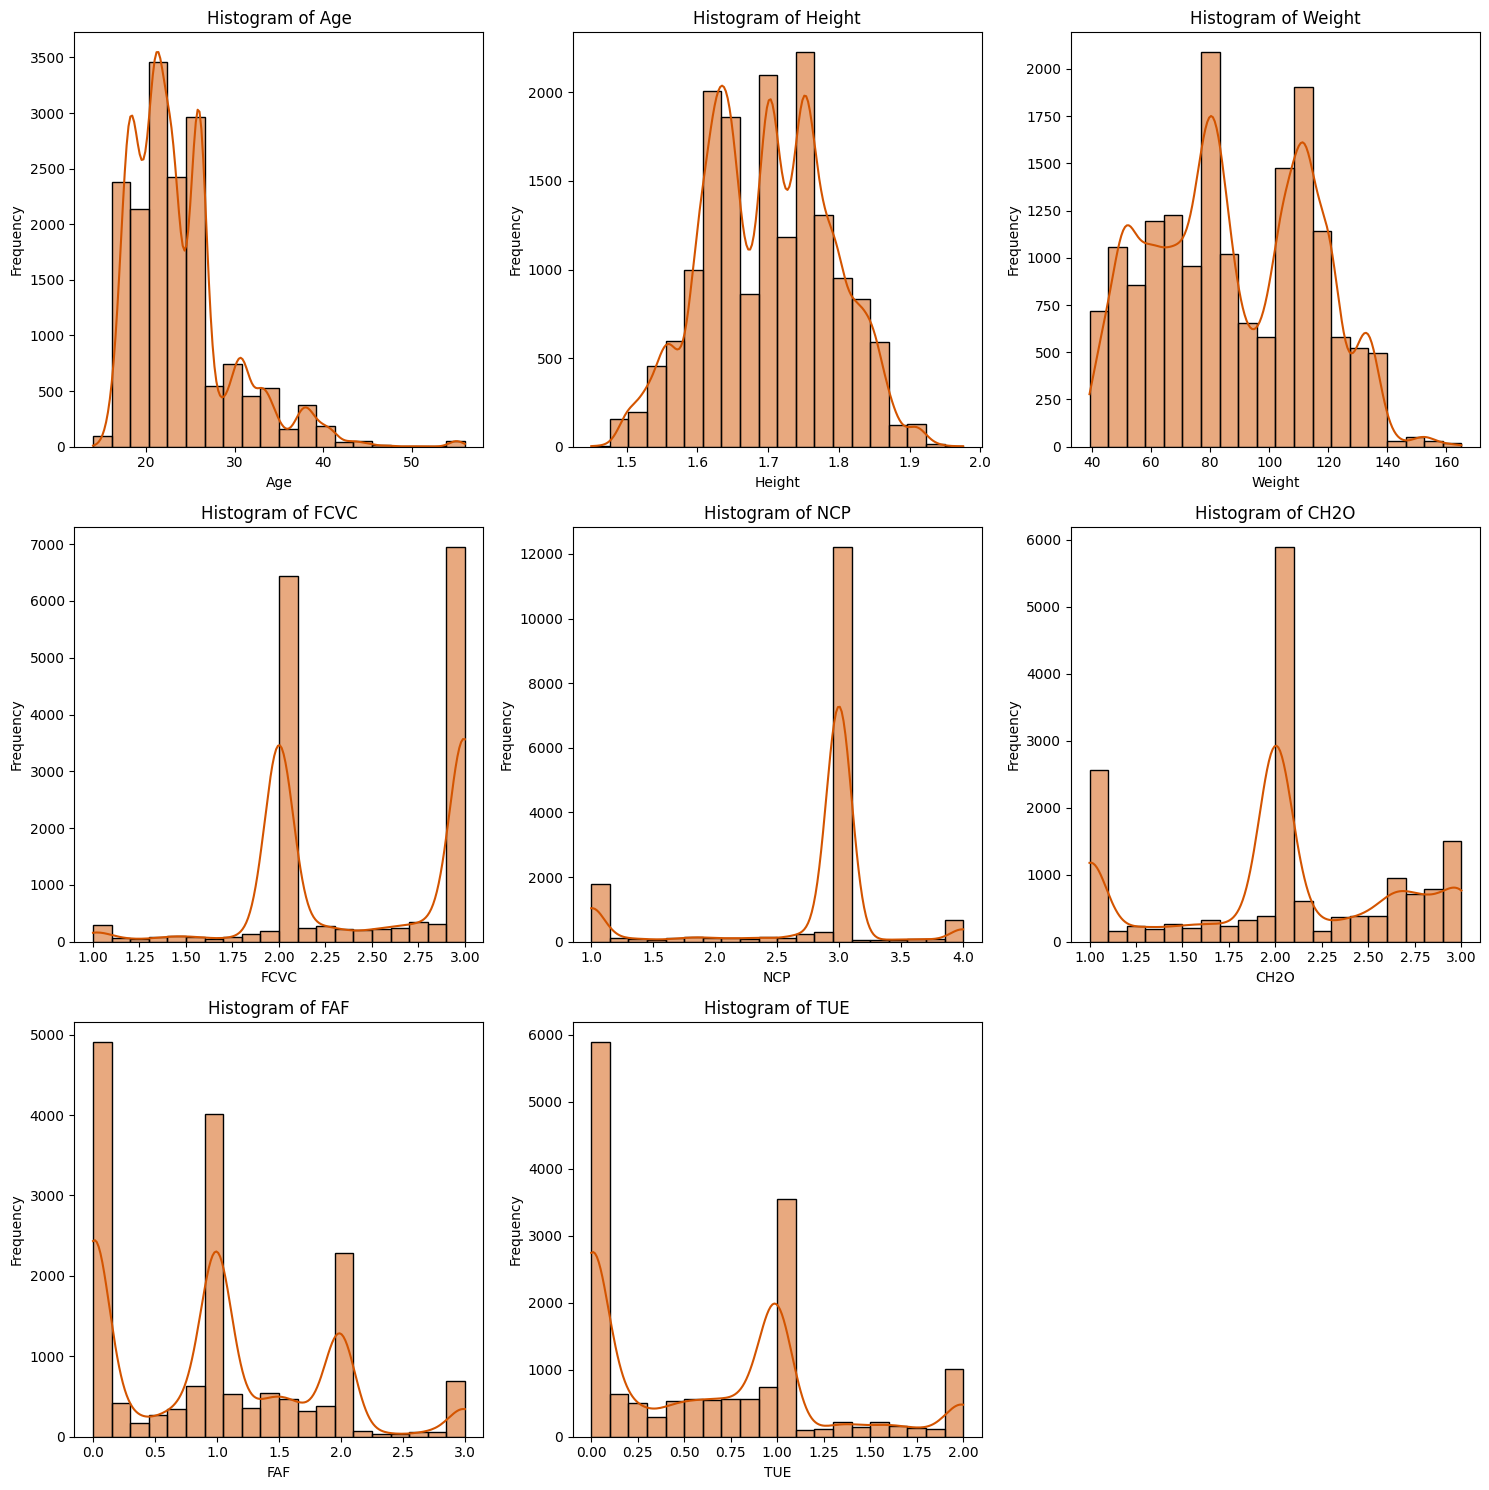

In [128]:
import seaborn as sns

# Create subplots
num_rows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Create histograms for each numeric column
for i, column in enumerate(numeric_columns):
    sns.histplot(X_train[column], kde=True, color='#D35400', bins=20, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide extra subplots
for j in range(len(numeric_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()

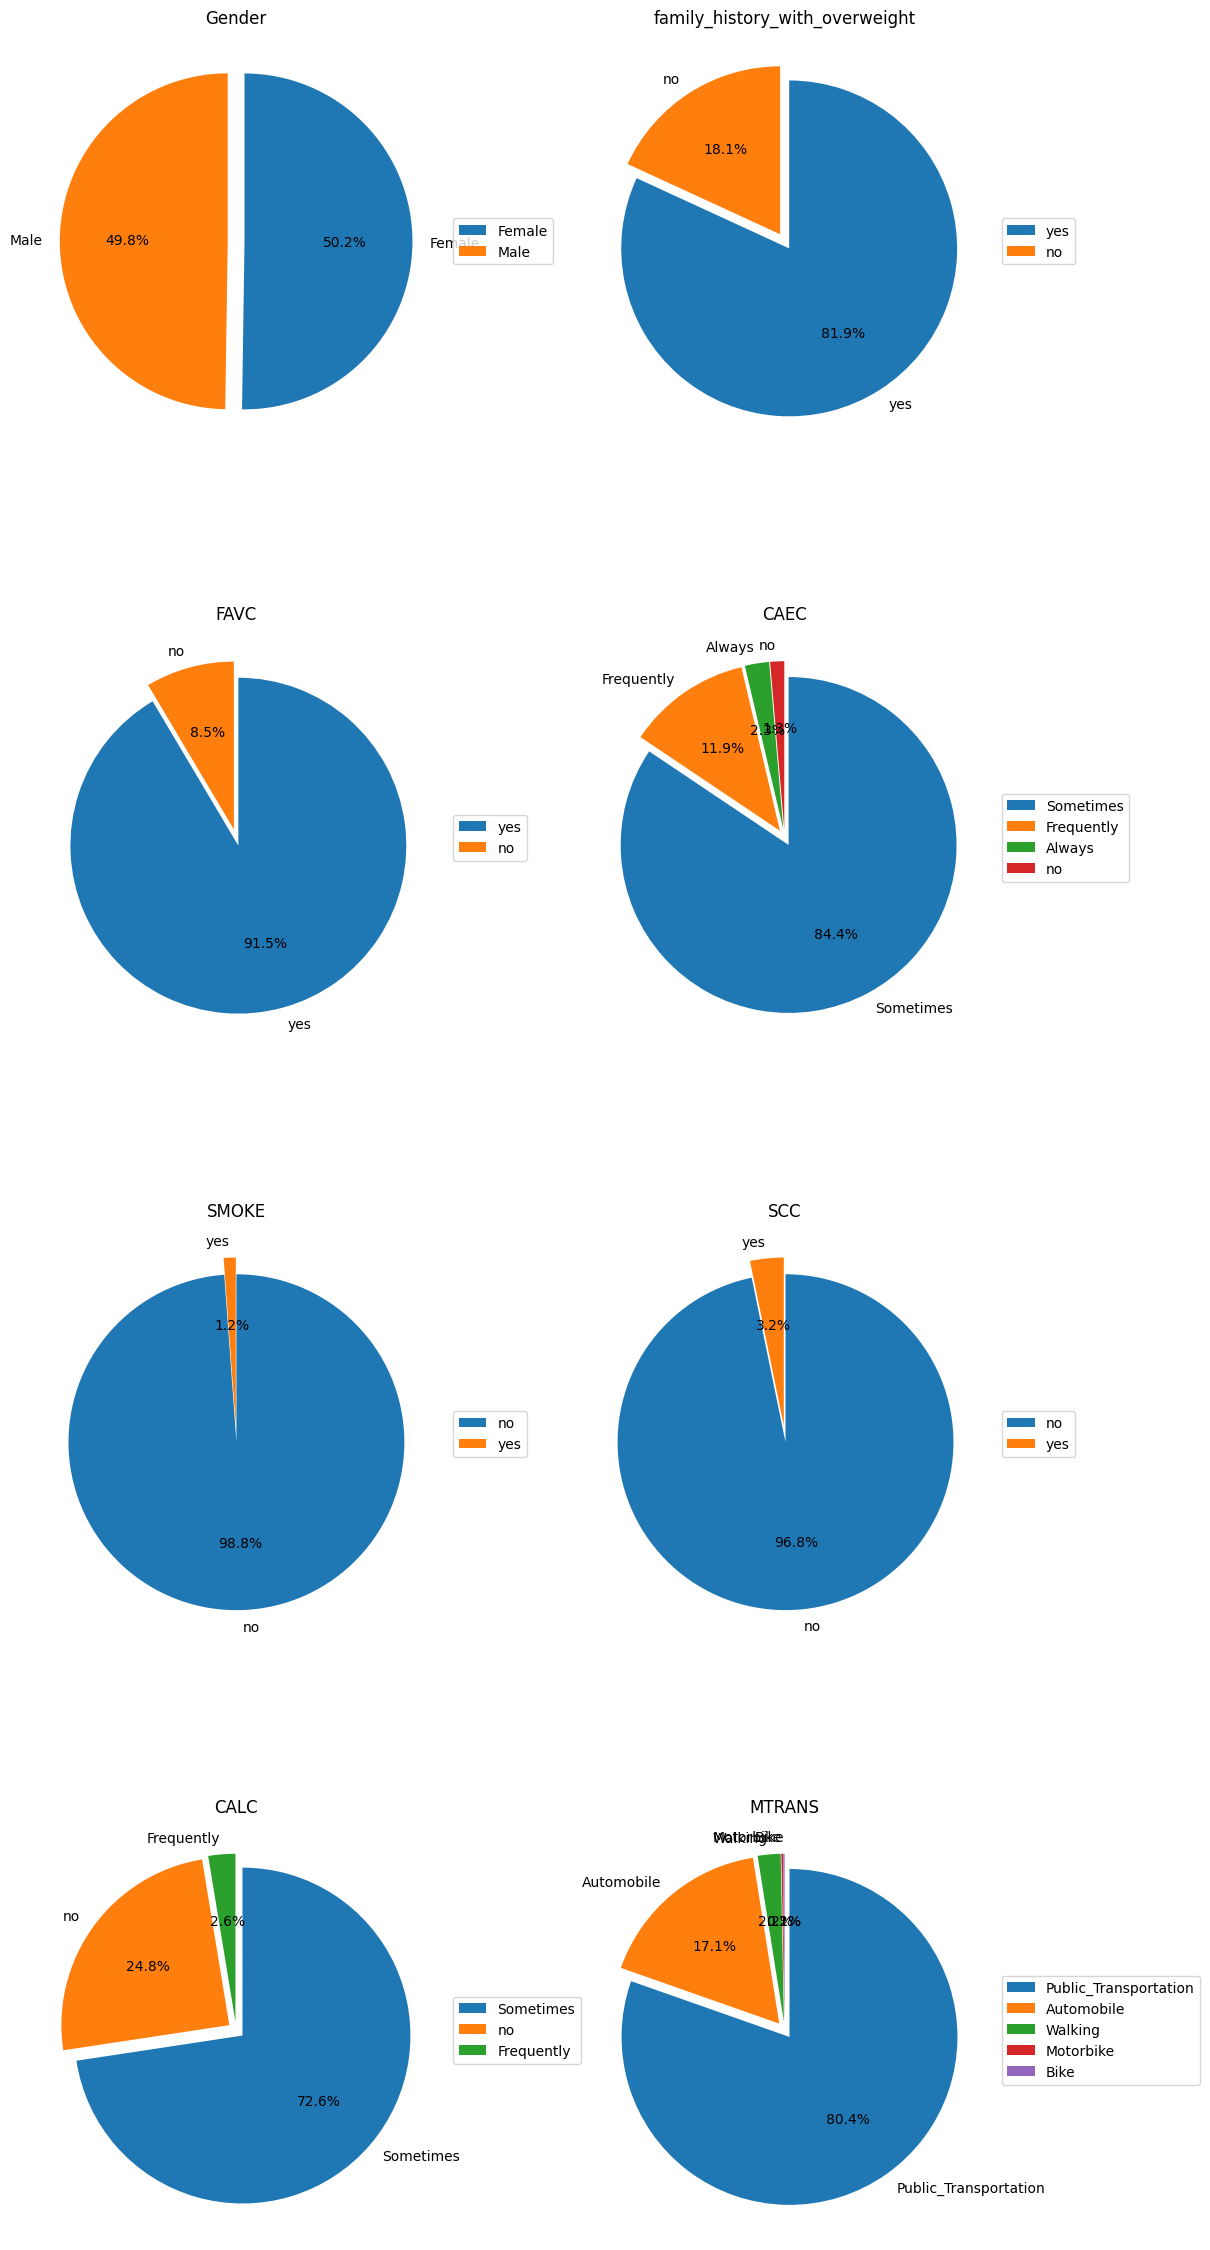

In [129]:
import math

import matplotlib.pyplot as plt

# Select object columns
object_cols = X_train.select_dtypes(include='object').columns
n_cols = 2  # Number of columns you want in your layout
n_plots = len(object_cols)
n_rows = math.ceil(n_plots / n_cols)

# Set up figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 6 * n_rows))
axes = axes.flatten()  # Flatten in case it's a 2D array

# Plot each pie chart
for i, col in enumerate(object_cols):
    counts = X_train[col].value_counts()
    explode = [0.05] * len(counts)  # push slices outward a bit

    counts.plot.pie(
        ax=axes[i],
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        explode=explode
    )
    axes[i].set_title(f'{col}')
    axes[i].set_ylabel('')
    axes[i].legend(labels=counts.index, loc='center left', bbox_to_anchor=(1, 0.5))  # legend outside
# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

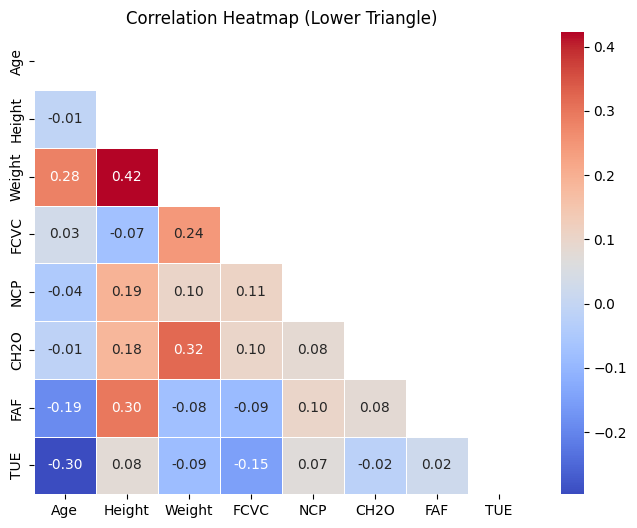

In [130]:
corr_matrix = X_train.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap (Lower Triangle)")
plt.show()

          name            aic  \
1   Johnson SU   98059.153741   
2   Log-Normal   98105.555693   
4      Weibull  100434.680520   
0       Normal  104739.447104   
3  Exponential  109153.124797   

                                              params  
1  (-4.572399614513097, 1.7374598931369074, 14.50...  
2  (0.5261356467649122, 13.708304762800994, 8.819...  
4  (1.8678699271738877, 13.996449469201028, 11.15...  
0            (23.839809708418645, 5.666682071738891)  
3                          (14.0, 9.839809708418645)  
****************************************************************************************************


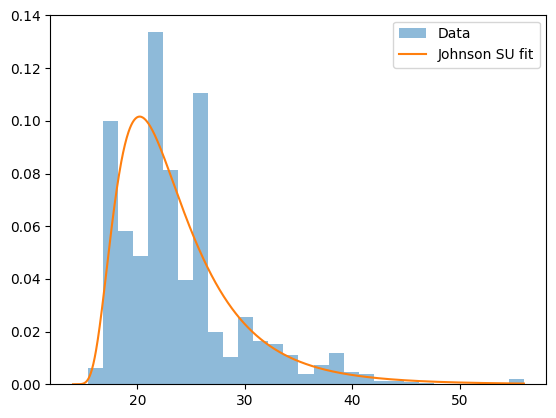

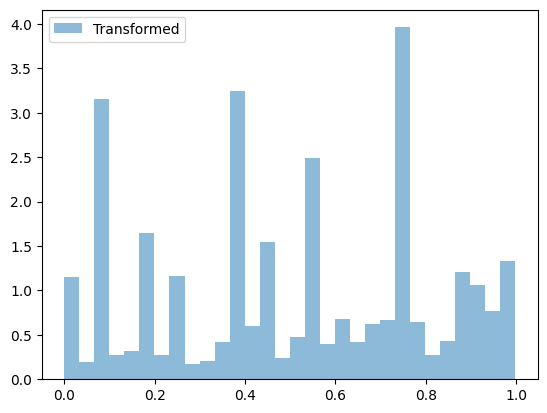

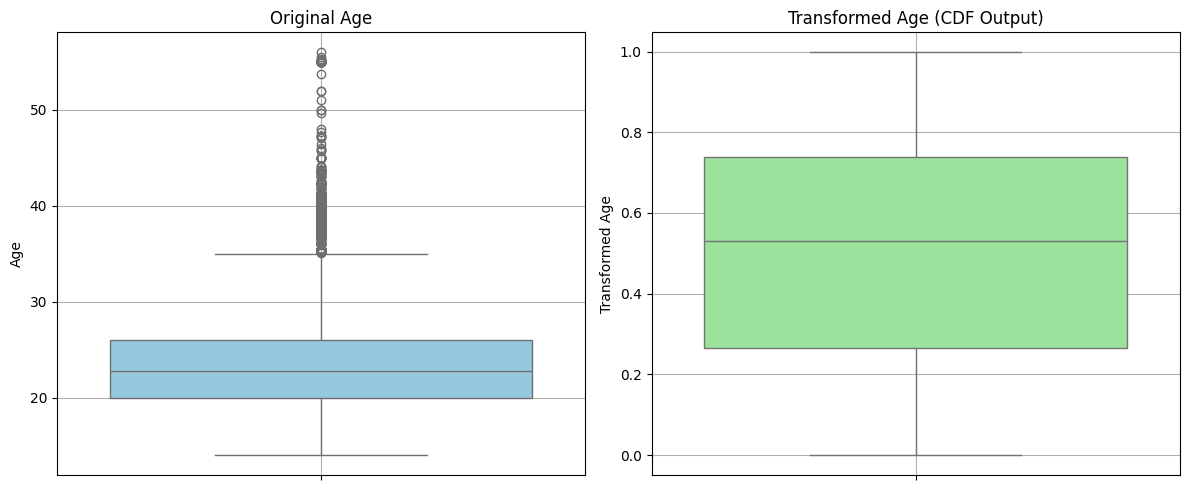

          name           aic  \
4      Weibull -34028.988085   
0       Normal -33782.995983   
2   Log-Normal -33781.570744   
1   Johnson SU -33779.514621   
3  Exponential -12826.870906   

                                              params  
4  (3.3564372609700923, 1.4361129182994101, 0.294...  
0          (1.6999904962061905, 0.08748819301943232)  
2  (0.005932863806320744, -13.046381838705711, 14...  
1  (-163.131041334158, 148.84088352360936, -8.705...  
3                        (1.45, 0.24999049620619052)  
****************************************************************************************************


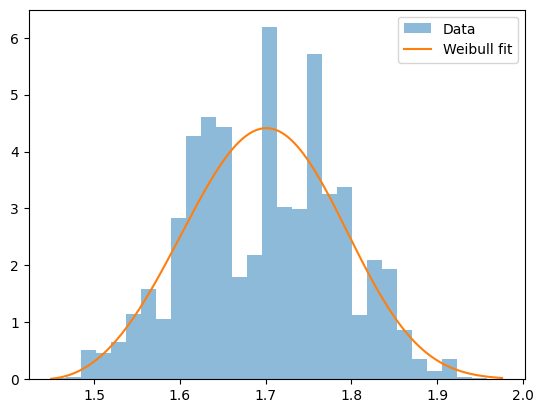

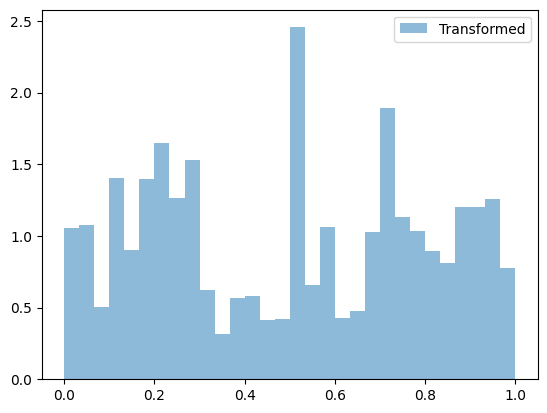

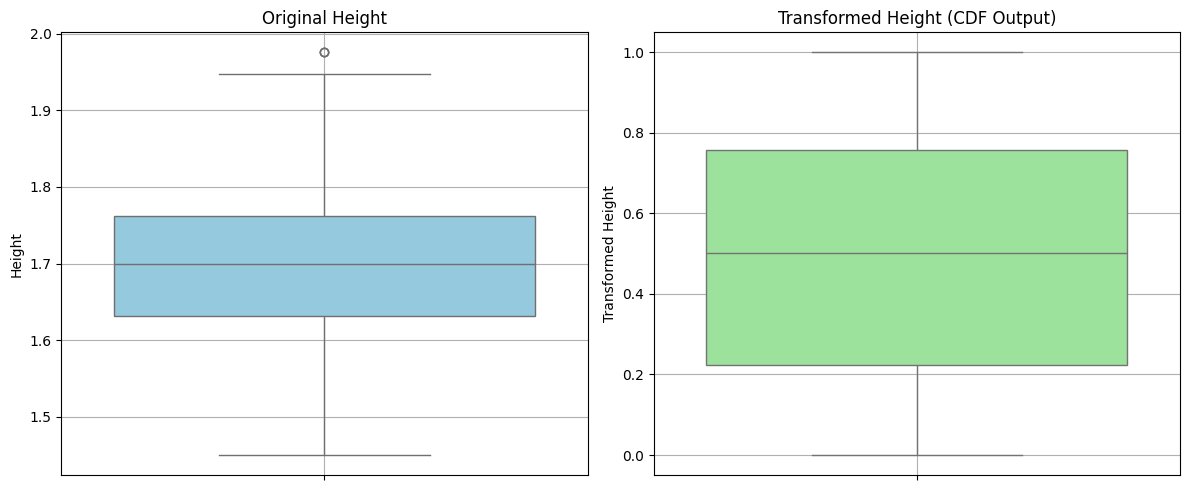

In [131]:
import numpy as np
import pandas as pd
import scipy.stats as stats


def evaluate_distributions(data, distributions):
    results = []

    for dist_info in distributions:
        dist = dist_info["dist"]
        name = dist_info["name"]
        constraint = dist_info["constraint"]

        if not constraint(data):
            continue

        try:
            # Fit distribution
            params = dist.fit(data)
            
            # Get log-likelihood
            loglik = np.sum(dist.logpdf(data, *params))
            
            # AIC = 2k - 2ln(L)
            k = len(params)
            aic = 2 * k - 2 * loglik
            
            results.append({
                "name": name,
                "aic": aic,
                "params": params
            })
        except Exception as e:
            print(f"Error fitting {name}: {e}")
            continue

    return pd.DataFrame(results).sort_values(by="aic")

DISTRIBUTIONS = [
    {
        "dist": stats.norm,
        "name": "Normal",
        "constraint": lambda data: True
    },
    {
        "dist": stats.johnsonsu,
        "name": "Johnson SU",
        "constraint": lambda data: True
    },
    {
        "dist": stats.lognorm,
        "name": "Log-Normal",
        "constraint": lambda data: (data > 0).all()
    },
    {
        "dist": stats.expon,
        "name": "Exponential",
        "constraint": lambda data: (data >= 0).all()
    },
    {
        "dist": stats.weibull_min,
        "name": "Weibull",
        "constraint": lambda data: (data > 0).all()
    },
]

best_fits = evaluate_distributions(X_train['Age'], DISTRIBUTIONS)
print(best_fits.head())
print("*" * 100)
import matplotlib.pyplot as plt

best = best_fits.iloc[0]
dist = [d for d in DISTRIBUTIONS if d['name'] == best['name']][0]['dist']
params = best['params']

x = np.linspace(X_train['Age'].min(), X_train['Age'].max(), 1000)
pdf = dist.pdf(x, *params)

plt.hist(X_train['Age'], bins=30, density=True, alpha=0.5, label="Data")
plt.plot(x, pdf, label=f"{best['name']} fit")
plt.legend()
plt.show()


X_train['Age_transformed'] = dist.cdf(X_train['Age'], *params)

# Plot versus the original Age column
plt.hist(X_train['Age_transformed'], bins=30, density=True, alpha=0.5, label="Transformed")
plt.legend()
plt.show()

# Create two subplots (side-by-side or stacked)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for original age
sns.boxplot(y=X_train['Age'], ax=axes[0], color='skyblue')
axes[0].set_title('Original Age')
axes[0].set_ylabel('Age')
axes[0].grid(True)

# Boxplot for transformed age
sns.boxplot(y=X_train['Age_transformed'], ax=axes[1], color='lightgreen')
axes[1].set_title('Transformed Age (CDF Output)')
axes[1].set_ylabel('Transformed Age')
axes[1].grid(True)

plt.tight_layout()
plt.show()



# Height
best_fits = evaluate_distributions(X_train['Height'], DISTRIBUTIONS)
print(best_fits.head())
print("*" * 100)
best = best_fits.iloc[0]
dist = [d for d in DISTRIBUTIONS if d['name'] == best['name']][0]['dist']
params = best['params']

x = np.linspace(X_train['Height'].min(), X_train['Height'].max(), 1000)
pdf = dist.pdf(x, *params)

plt.hist(X_train['Height'], bins=30, density=True, alpha=0.5, label="Data")
plt.plot(x, pdf, label=f"{best['name']} fit")
plt.legend()
plt.show()

# Transform the Height column with the best fit
X_train['Height_transformed'] = dist.cdf(X_train['Height'], *params)

# Plot versus the original Height column
plt.hist(X_train['Height_transformed'], bins=30, density=True, alpha=0.5, label="Transformed")
plt.legend()
plt.show()


# Create two subplots (side-by-side or stacked)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for original age
sns.boxplot(y=X_train['Height'], ax=axes[0], color='skyblue')
axes[0].set_title('Original Height')
axes[0].set_ylabel('Height')
axes[0].grid(True)

# Boxplot for transformed age
sns.boxplot(y=X_train['Height_transformed'], ax=axes[1], color='lightgreen')
axes[1].set_title('Transformed Height (CDF Output)')
axes[1].set_ylabel('Transformed Height')
axes[1].grid(True)

plt.tight_layout()
plt.show()



In [132]:
X_train[["Age", "Age_transformed"]].sort_values(by="Age", ascending=False).tail(10)

,Age,Age_transformed
17866,16.0,3.512315e-03
18223,16.0,3.512315e-03
15357,16.0,3.512315e-03
10362,16.0,3.512315e-03
11336,16.0,3.512315e-03
924,15.0,6.033379e-05
6343,15.0,6.033379e-05
20504,15.0,6.033379e-05
4776,14.0,5.334007e-08
3226,14.0,5.334007e-08


In [133]:
# Make ordinal encoding for the following features:
# Gender, Family history, FAVC, CAEC, SMOKE, SCC, CALC, MTRANS.

from sklearn.preprocessing import OrdinalEncoder

ordinal_features = [
    "Gender",
    "family_history_with_overweight",
    "FAVC",
    "CAEC",
    "SMOKE",
    "SCC",
    "CALC",
    "MTRANS"
]

encoder = OrdinalEncoder()
X_train[ordinal_features] = encoder.fit_transform(X_train[ordinal_features])


In [134]:
X_train[ordinal_features].head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
4515,1.0,1.0,1.0,2.0,0.0,0.0,1.0,3.0
7949,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0
20677,1.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0
18079,1.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0
5129,1.0,1.0,1.0,2.0,0.0,0.0,1.0,3.0


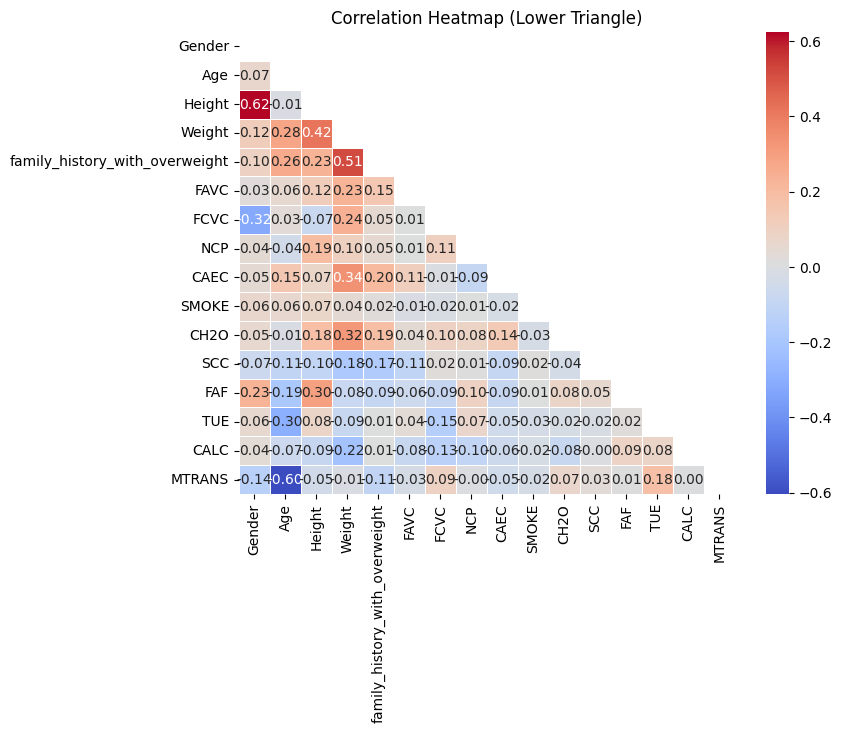

In [135]:
corr_matrix = X_train.drop(columns=['Age_transformed', 'Height_transformed']).corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap (Lower Triangle)")
plt.show()

In [136]:
X_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Age_transformed,Height_transformed
4515,1.0,22.000000,1.710000,90.000000,1.0,1.0,2.000000,1.000000,2.0,0.0,2.000000,0.0,1.000000,2.000000,1.0,3.0,0.461328,0.544687
7949,0.0,41.000000,1.640000,77.000000,1.0,1.0,3.000000,1.000000,2.0,0.0,2.000000,0.0,0.000000,0.000000,1.0,0.0,0.981584,0.253348
20677,1.0,18.000000,1.800000,56.000000,1.0,1.0,2.000000,4.000000,1.0,0.0,2.000000,0.0,2.000000,1.000000,2.0,0.0,0.082604,0.870207
18079,1.0,18.000000,1.700000,85.000000,1.0,1.0,2.000000,3.000000,1.0,0.0,2.000000,0.0,2.000000,1.000000,0.0,3.0,0.082604,0.500642
5129,1.0,22.735328,1.849425,121.657979,1.0,1.0,2.352323,2.699971,2.0,0.0,2.357978,0.0,1.684582,0.739609,1.0,3.0,0.525442,0.956320


---
## **4. Prepare the data for machine learning algorithms.**

In [137]:
df = pd.read_csv("../data/obesity_risk_project/train.csv")
from sklearn.model_selection import train_test_split

X = df.drop(columns=["id", "NObeyesdad"])
y = df["NObeyesdad"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
) 

### Transform X features

In [138]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class FeaturesTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.ordinal_features =[
            "Gender",
            "family_history_with_overweight",
            "FAVC",
            "CAEC",
            "SMOKE",
            "SCC",
            "CALC",
            "MTRANS"
        ]
        self.age_dist = None
        self.height_dist = None
        self.unknown_value = -1


    def fit(self, X, y=None):
        # Initialize and fit the ordinal encoder with handling for unknown categories
        self.ordinal_encoder = OrdinalEncoder(
            handle_unknown='use_encoded_value',
            unknown_value=self.unknown_value
        )
        self.ordinal_encoder.fit(X[self.ordinal_features])
        
        # Calculate encoded values and their medians
        self.encoded_columns = self.ordinal_encoder.transform(X[self.ordinal_features])
        # Compute median per column and round to nearest integer
        self.ordinal_column_medians = np.round(np.median(self.encoded_columns, axis=0)).astype(int)

        # Fit distributions for Age and Height
        # For Age Johnson SU distribution
        self.age_dist = stats.johnsonsu.fit(X['Age'].dropna())
        # For Height Weibull distribution
        self.height_dist = stats.weibull_min.fit(X['Height'].dropna())

        return self

    def transform(self, X, y=None):
        X_transformed = X.copy()
        X_transformed[self.ordinal_features] = self.ordinal_encoder.transform(
            X[self.ordinal_features])
        # Replace unknown_value with the rounded median for each feature
        for feature, median in zip(self.ordinal_features, self.ordinal_column_medians):
            X_transformed[feature] = X_transformed[feature].replace(self.unknown_value, median)
        X_transformed['Age'] = stats.johnsonsu.cdf(X['Age'], *self.age_dist)
        X_transformed['Height'] = stats.weibull_min.cdf(X['Height'], *self.height_dist)

        return X_transformed

In [139]:
X_train_transformed = FeaturesTransformer().fit_transform(X_train)

In [140]:
X_train_transformed.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
4515,1.0,0.461328,0.544687,90.000000,1.0,1.0,2.000000,1.000000,2.0,0.0,2.000000,0.0,1.000000,2.000000,1.0,3.0
7949,0.0,0.981584,0.253348,77.000000,1.0,1.0,3.000000,1.000000,2.0,0.0,2.000000,0.0,0.000000,0.000000,1.0,0.0
20677,1.0,0.082604,0.870207,56.000000,1.0,1.0,2.000000,4.000000,1.0,0.0,2.000000,0.0,2.000000,1.000000,2.0,0.0
18079,1.0,0.082604,0.500642,85.000000,1.0,1.0,2.000000,3.000000,1.0,0.0,2.000000,0.0,2.000000,1.000000,0.0,3.0
5129,1.0,0.525442,0.956320,121.657979,1.0,1.0,2.352323,2.699971,2.0,0.0,2.357978,0.0,1.684582,0.739609,1.0,3.0


## 5. Select a model, train & Fine-tune it

In [141]:
# TODO Models to test:
# SVM
# Decision Tree
# Boosting:
# -  AdaBoostClassifier
# -  GradientBoostingClassifier
# -  HistGradientBoostingClassifier
# Ensemble:
# -  BaggingClassifier
# -  RandomForestClassifier
# -  VotingClassifier (hard & soft)
# Stacking:
# -  StackingClassifier (Use the best models found in the previous steps)
SEED = 42

### Pipeline

In [142]:
# Preprocessing pipeline
from sklearn.pipeline import Pipeline

preprocessing_pipeline = Pipeline([
    ("features_transformer", FeaturesTransformer()),
])

In [143]:
# Metric
from sklearn.metrics import accuracy_score
from skopt.space import Real, Categorical, Integer
from skopt import BayesSearchCV

In [144]:
# Result
results = {}

### Support Vector Machine

In [145]:
from sklearn.svm import SVC

# Support Vector Machine

# search_spaces = {
#     'kernel': Categorical(['rbf', 'linear', 'poly']),
#     'C': Real(1, 100, prior='log-uniform'),
#     'class_weight': Categorical(['balanced', None])
# }

# bayes_cv = BayesSearchCV(
#     SVC(random_state=SEED, verbose=True),
#     search_spaces,
#     n_iter=20,
#     cv=2,
#     n_jobs=-1,
#     verbose=10,
#     random_state=SEED,
#     scoring='accuracy'
# )

# # Fit the model in the pipeline
# pipeline = Pipeline([
#     ("preprocessing", preprocessing_pipeline),
#     ("bayes_cv", bayes_cv)
# ],
#     verbose=True)

# pipeline.fit(X_train, y_train)


# # Best params
# print(f"Best params: {bayes_cv.best_params_}")

# # Best score
# print(f"Best score: {bayes_cv.best_score_}")

# # Accuracy
# y_pred = pipeline.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")

In [146]:
results["SVM"] = {
    "best_params": {
        "C": 5.54393775401953,
        "class_weight": None,
        "kernel": "linear"
    },
    "best_score": 0.8656509695290859,
    "accuracy": 0.8668111753371869
}

### Decision Tree

In [147]:
from sklearn.tree import DecisionTreeClassifier

# search_spaces = {
#     'criterion': Categorical(['gini', 'entropy', 'log_loss']),
#     'min_samples_split': Integer(2, 50),
#     'min_samples_leaf': Integer(1, 50),
#     'class_weight': Categorical(['balanced', None]),
#     'max_features': Categorical(['sqrt', 'log2', None])
# }

# bayes_cv = BayesSearchCV(
#     DecisionTreeClassifier(random_state=SEED),
#     search_spaces,
#     n_iter=20,
#     cv=2,
#     n_jobs=-1,
#     verbose=10,
#     random_state=SEED,
#     scoring='accuracy'
# )

# # Fit the model in the pipeline
# pipeline = Pipeline([
#     ("preprocessing", preprocessing_pipeline),
#     ("bayes_cv", bayes_cv)
# ],
#     verbose=True)

# pipeline.fit(X_train, y_train)

# # Best params
# print(f"Best params: {bayes_cv.best_params_}")

# # Best score
# print(f"Best score: {bayes_cv.best_score_}")

# Accuracy
# y_pred = pipeline.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")

In [148]:
results["Decision_Tree"] = {
    "best_params": {
        "class_weight": "balanced",
        "criterion": "log_loss",
        "max_features": None,
        "min_samples_leaf": 13,
        "min_samples_split": 30
    },
    "best_score": 0.8726363964831989,
    "accuracy": 0.880057803468208
}

### Boosting

#### Adaptive Boosting

In [149]:
from sklearn.ensemble import AdaBoostClassifier

# With Decision Tree (SVC its not use because its too slow)
# Best parameters before run = ('class_weight', 'balanced'), ('criterion', 'log_loss'), ('max_features', None), ('min_samples_leaf', 13), ('min_samples_split', 30)
# search_spaces = {
#     'n_estimators': Integer(99, 200), # Based on the previous results
#     'learning_rate': Real(1.9, 3.0), # Based on the previous results
# }

# bayes_cv = BayesSearchCV(
#     AdaBoostClassifier(
#         estimator=DecisionTreeClassifier(
#             class_weight='balanced',
#             criterion='log_loss',
#             max_features=None,
#             min_samples_leaf=13,
#             min_samples_split=30,
#             random_state=SEED
#         ),
#         random_state=SEED
#     ),
#     search_spaces,
#     n_iter=10, # Based on the previous results
#     cv=5, # Based on the previous results
#     n_jobs=-1,
#     verbose=10,
#     random_state=SEED,
#     scoring='accuracy'
#     )

# # Fit the model in the pipeline
# pipeline = Pipeline([
#     ("preprocessing", preprocessing_pipeline),
#     ("bayes_cv", bayes_cv)
# ],
#     verbose=True)

# pipeline.fit(X_train, y_train)

# # Best params
# print(f"Best params: {bayes_cv.best_params_}")

# # Best score
# print(f"Best score: {bayes_cv.best_score_}")

# # Accuracy
# y_pred = pipeline.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}") 


In [150]:
results["AdaBoost"] = {
    "best_params": {
        "learning_rate": 2.951025784940921,
        "n_estimators": 170
    },
    "best_score": 0.90057818987448,
    "accuracy": 0.9048651252408478
}

#### Gradient Boosting

In [151]:
from sklearn.ensemble import GradientBoostingClassifier

# search_space = {
#     'n_estimators': Integer(1, 100),
#     'learning_rate': Real(0.01, 3, 'log-uniform'),
# }

# bayes_cv = BayesSearchCV(
#     GradientBoostingClassifier(random_state=SEED, verbose=10),
#     search_space,
#     n_iter=20,
#     cv=2,
#     n_jobs=-1,
#     verbose=10,
#     random_state=SEED,
#     scoring='accuracy'
# )

# pipeline = Pipeline([
#     ("preprocessing", preprocessing_pipeline),
#     ("bayes_cv", bayes_cv)
# ],
#     verbose=True)

# pipeline.fit(X_train, y_train)

# print(f"Best params: {bayes_cv.best_params_}")
# print(f"Best score: {bayes_cv.best_score_}")

# y_pred = pipeline.predict(X_test)   
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")

In [152]:
results["Gradient_Boosting"] = {
    "best_params": {
        "learning_rate": 0.1264457017465511,
        "n_estimators": 92
    },
    "best_score": 0.9011802962784536,
    "accuracy": 0.9072736030828517
}

#### Histogram-based Gradient Boosting

In [153]:
from sklearn.ensemble import HistGradientBoostingClassifier

# search_space = {
#     'max_iter': Integer(1, 100),
#     'learning_rate': Real(0.01, 3, 'log-uniform'),
#     'l2_regularization': Real(1e-10, 3, 'log-uniform'),
# }

# bayes_cv = BayesSearchCV(
#     HistGradientBoostingClassifier(random_state=SEED, verbose=10),
#     search_space,
#     n_iter=20,
#     cv=2,
#     n_jobs=-1,
#     verbose=10,
#     random_state=SEED,
#     scoring='accuracy'
# )

# pipeline = Pipeline([
#     ("preprocessing", preprocessing_pipeline),
#     ("bayes_cv", bayes_cv)
# ],
#     verbose=True)

# pipeline.fit(X_train, y_train)

# print(f"Best params: {bayes_cv.best_params_}")
# print(f"Best score: {bayes_cv.best_score_}")

# y_pred = pipeline.predict(X_test)   
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")

In [154]:
results["Hist_Gradient_Boosting"] = {
    "best_params": {
        "l2_regularization": 0.49584971139012857,
        "learning_rate": 0.09516678622913977,
        "max_iter": 62,
    },
    "best_score": 0.9011200770805733,
    "accuracy": 0.904383429672447
}

### Bagging and Pasting

#### Bagging

In [155]:
from sklearn.ensemble import BaggingClassifier

# search_space = {
#     'n_estimators': Integer(1, 100),
#     'max_samples': Real(0.1, 1, 'uniform'),
# }
# bayes_cv = BayesSearchCV(
#     BaggingClassifier(
#         estimator=DecisionTreeClassifier(
#         class_weight='balanced',
#         criterion='log_loss',
#         max_features=None,
#         min_samples_leaf=13,
#         min_samples_split=30,
#         random_state=SEED
#         ),
#         random_state=SEED,
#         verbose=10,
#         n_jobs=-1,
#         bootstrap=True), # Bagging
#     search_space,
#     n_iter=20,
#     cv=2,
#     n_jobs=-1,
#     verbose=10,
#     random_state=SEED,
#     scoring='accuracy'
# )

# pipeline = Pipeline([
#     ("preprocessing", preprocessing_pipeline),
#     ("bayes_cv", bayes_cv)
# ],
#     verbose=True)

# pipeline.fit(X_train, y_train)

# print(f"Best params: {bayes_cv.best_params_}")
# print(f"Best score: {bayes_cv.best_score_}")

# y_pred = pipeline.predict(X_test)   
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")

In [156]:
results["Bagging"] = {
    "best_params": {
        "max_samples": 1,
        "n_estimators": 92
    },
    "best_score": 0.8829338793207274,
    "accuracy": 0.8933044315992292
}

#### Pasting

In [157]:
from sklearn.ensemble import BaggingClassifier

# search_space = {
#     'n_estimators': Integer(1, 100),
#     'max_samples': Real(0.1, 1, 'uniform'),
# }
# bayes_cv = BayesSearchCV(
#     BaggingClassifier(
#         estimator=DecisionTreeClassifier(
#         class_weight='balanced',
#         criterion='log_loss',
#         max_features=None,
#         min_samples_leaf=13,
#         min_samples_split=30,
#         random_state=SEED
#         ),
#         random_state=SEED,
#         verbose=10,
#         n_jobs=-1,
#         bootstrap=False), # Pasting
#     search_space,
#     n_iter=20,
#     cv=2,
#     n_jobs=-1,
#     verbose=10,
#     random_state=SEED,
#     scoring='accuracy'
# )

# pipeline = Pipeline([
#     ("preprocessing", preprocessing_pipeline),
#     ("bayes_cv", bayes_cv)
# ],
#     verbose=True)

# pipeline.fit(X_train, y_train)

# print(f"Best params: {bayes_cv.best_params_}")
# print(f"Best score: {bayes_cv.best_score_}")

# y_pred = pipeline.predict(X_test)   
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")

In [158]:
results["Pasting"] = {
    "best_params": {
        "max_samples": 0.6553714226520847,
        "n_estimators": 78
    },
    "best_score": 0.8829940985186078,
    "accuracy": 0.8935452793834296
}

### Random Forest

In [159]:
from sklearn.ensemble import RandomForestClassifier

# search_space = {
#     'n_estimators': Integer(1, 200),
#     'max_features': Real(0.1, 1, 'uniform'),
#     'bootstrap': [True, False],
#     'class_weight': ['balanced', None],
#     'criterion': ['gini', 'entropy', 'log_loss']
# }

# bayes_cv = BayesSearchCV(
#     RandomForestClassifier(random_state=SEED),
#     search_space,
#     n_iter=20,
#     cv=2,
#     n_jobs=-1,
#     verbose=10,
#     random_state=SEED,
#     scoring='accuracy'
# )

# pipeline = Pipeline([
#     ("preprocessing", preprocessing_pipeline),
#     ("bayes_cv", bayes_cv)
# ],
#     verbose=True)

# pipeline.fit(X_train, y_train)

# print(f"Best params: {bayes_cv.best_params_}")
# print(f"Best score: {bayes_cv.best_score_}")

# y_pred = pipeline.predict(X_test)   
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")

In [160]:
results["Random_Forest"] = {
    "best_params": {
        "bootstrap": True,
        "class_weight": None,
        "criterion": 'gini',
        "max_features": 0.45041387664183663,
        "n_estimators": 104
    },
    "best_score": 0.8967240756353125,
    "accuracy": 0.9063102119460501
}

In [161]:
from tabulate import tabulate

def print_results(results):
    # Build and sort the data by accuracy (descending)
    table_data = sorted(
        [(k, round(v['accuracy'], 4), round(v['best_score'],4), v['best_params']) for k, v in results.items()],
        key=lambda x: x[1],
        reverse=True
    )

    # Customize column headers
    headers = ["Model Name", "Accuracy", "Best Score", "Best Hyperparameters"]

    # Print the table with wider formatting
    print(tabulate(table_data, headers=headers, tablefmt="grid", colalign=("left", "center", "center", "left")))


print_results(results)


+------------------------+------------+--------------+------------------------------------------------------------------------------------------------------------------------------+
| Model Name             |  Accuracy  |  Best Score  | Best Hyperparameters                                                                                                         |
+========================+============+==============+==============================================================================================================================+
| Gradient_Boosting      |   0.9073   |    0.9012    | {'learning_rate': 0.1264457017465511, 'n_estimators': 92}                                                                    |
+------------------------+------------+--------------+------------------------------------------------------------------------------------------------------------------------------+
| Random_Forest          |   0.9063   |    0.8967    | {'bootstrap': True, 'class_weight':

### Voting

In [162]:
results["Gradient_Boosting"]["best_params"]

{'learning_rate': 0.1264457017465511, 'n_estimators': 92}

In [163]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

# def with_seed(cls, params):
#     return cls(**{**params, "random_state": SEED})

# combinations = [
#     [
#         ("Gradient_Boosting", with_seed(GradientBoostingClassifier, results["Gradient_Boosting"]["best_params"])),
#         ("Random_Forest", with_seed(RandomForestClassifier, results["Random_Forest"]["best_params"])),
#         ("AdaBoost", with_seed(AdaBoostClassifier, results["AdaBoost"]["best_params"])),
#         ("Hist_Gradient_Boosting", with_seed(HistGradientBoostingClassifier, results["Hist_Gradient_Boosting"]["best_params"]))
#     ],
#     [
#         ("Gradient_Boosting", with_seed(GradientBoostingClassifier, results["Gradient_Boosting"]["best_params"])),
#         ("Random_Forest", with_seed(RandomForestClassifier, results["Random_Forest"]["best_params"]))
#     ],
#     [
#         ("Gradient_Boosting", with_seed(GradientBoostingClassifier, results["Gradient_Boosting"]["best_params"])),
#         ("Random_Forest", with_seed(RandomForestClassifier, results["Random_Forest"]["best_params"])),
#         ("AdaBoost", with_seed(AdaBoostClassifier, results["AdaBoost"]["best_params"]))
#     ]
# ]

# best_score = 0
# best_model = None
# best_params = {}

# for estimators in combinations:
#     for voting in ['hard', 'soft']:
#         model = VotingClassifier(estimators=estimators, voting=voting, n_jobs=-1)
#         pipe = Pipeline([
#             ("preprocessing", preprocessing_pipeline),
#             ("model", model)
#         ])
#         scores = cross_val_score(pipe, X_train, y_train, cv=2, scoring='accuracy', n_jobs=-1)
#         mean_score = scores.mean()
#         print(f"Voting={voting}, estimators={[name for name, _ in estimators]} => Score={mean_score:.4f}")
        
#         if mean_score > best_score:
#             best_score = mean_score
#             best_model = pipe
#             best_params = {
#                 "Voting": voting,
#                 "Estimators": [name for name, _ in estimators],
#                 "Score": best_score
#             }

# best_model.fit(X_train, y_train)
# y_pred = best_model.predict(X_test)
# print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# # Print best parameters
# print("\n🔍 Best configuration:")
# print(f"Voting strategy: {best_params['Voting']}")
# print("Estimators and their hyperparameters:")
# print(best_params["Estimators"])
# print(f"Best Score: {best_params['Score']}")


In [164]:
results["Voting"] = {
    "best_params": {
        "voting": "soft",
        "Estimators": [
            "Gradient_Boosting",
            "Random_Forest",
            "AdaBoost",
            "Hist_Gradient_Boosting"
        ]
    },
    "best_score": 0.9042514753703481,
    "accuracy": 0.9085
}

In [165]:
print_results(results)

+------------------------+------------+--------------+------------------------------------------------------------------------------------------------------------------------------+
| Model Name             |  Accuracy  |  Best Score  | Best Hyperparameters                                                                                                         |
+========================+============+==============+==============================================================================================================================+
| Voting                 |   0.9085   |    0.9043    | {'voting': 'soft', 'Estimators': ['Gradient_Boosting', 'Random_Forest', 'AdaBoost', 'Hist_Gradient_Boosting']}               |
+------------------------+------------+--------------+------------------------------------------------------------------------------------------------------------------------------+
| Gradient_Boosting      |   0.9073   |    0.9012    | {'learning_rate': 0.126445701746551

### Stacking

In [166]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# def with_seed(cls, params):
#     return cls(**{**params, "random_state": SEED})

# # Define base models with your tuned parameters
# base_models = [
#     ('gb', with_seed(GradientBoostingClassifier, results["Gradient_Boosting"]["best_params"])),
#     ('rf', with_seed(RandomForestClassifier, results["Random_Forest"]["best_params"])),
#     ('ada', with_seed(AdaBoostClassifier, results["AdaBoost"]["best_params"])),
#     ('hgb', with_seed(HistGradientBoostingClassifier, results["Hist_Gradient_Boosting"]["best_params"])),
#     # ('dt', with_seed(DecisionTreeClassifier, results["Decision_Tree"]["best_params"])),
#     ('SVM', with_seed(SVC, results["SVM"]["best_params"])),
# ]
# # Define meta-model
# meta_model = LogisticRegression(
#     multi_class='multinomial',
#     random_state=SEED,
#     verbose=10,
#     n_jobs=-1
# )

# # Create stacking classifier
# stacking_model = StackingClassifier(
#     estimators=base_models,
#     final_estimator=meta_model,
#     cv=2,
#     n_jobs=-1,
#     verbose=10
# )

# pipe = Pipeline([
#     ("preprocessing", preprocessing_pipeline),
#     ("model", stacking_model)
# ])

# pipe.fit(X_train, y_train)

# # Make predictions on your test data
# y_pred = pipe.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")

# # Print best parameters
# print("\n🔍 Best configuration:")
# print(f"Base models: {[name for name, _ in base_models]}")
# print(f"Meta model: {meta_model}")

In [167]:
results["Stacking"] = {
    "best_params": {
        "base_models": [
            "Gradient_Boosting",
            "Random_Forest",
            "AdaBoost",
            "Hist_Gradient_Boosting",
            "SVM"
        ],
        "meta_model": LogisticRegression(
            multi_class='multinomial',
            random_state=SEED,
            verbose=10,
            n_jobs=-1
        )
    },
    "best_score": 0,
    "accuracy": 0.9099229287090559
}

## 6. Solution

### Final Results

In [168]:
print_results(results)
# Based on the results the best model is Stacking

+------------------------+------------+--------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Model Name             |  Accuracy  |  Best Score  | Best Hyperparameters                                                                                                                                                                         |
+========================+============+==============+==============================================================================================================================================================================================+
| Stacking               |   0.9099   |      0       | {'base_models': ['Gradient_Boosting', 'Random_Forest', 'AdaBoost', 'Hist_Gradient_Boosting', 'SVM'], 'meta_model': LogisticRegression(multi_class='multinomial', n_jobs=-1, random_state=42, |
|               

### Final test for Submission 

In [169]:
final_test = pd.read_csv("../data/obesity_risk_project/test.csv")
id = final_test["id"]
final_test = final_test.drop(columns=["id"]) # TODO add this to the pipeline
final_test.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [170]:
print(final_test["CALC"].unique())

print(X_train["CALC"].unique())

['Sometimes' 'no' 'Frequently' 'Always']
['Sometimes' 'no' 'Frequently']


In [171]:
final_test[final_test["CALC"] == 'Always']

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
4023,Female,20.0,1.66,60.0,yes,yes,3.0,3.0,Always,no,2.0,no,0.0,0.0,Always,Public_Transportation
7443,Male,21.0,1.67,66.5,no,yes,2.0,3.0,Frequently,no,2.0,no,1.0,0.0,Always,Public_Transportation


In [172]:

def with_seed(cls, params):
    return cls(**{**params, "random_state": SEED})

# Define base models with your tuned parameters
base_models = [
    ('gb', with_seed(GradientBoostingClassifier, results["Gradient_Boosting"]["best_params"])),
    ('rf', with_seed(RandomForestClassifier, results["Random_Forest"]["best_params"])),
    ('ada', with_seed(AdaBoostClassifier, results["AdaBoost"]["best_params"])),
    ('hgb', with_seed(HistGradientBoostingClassifier, results["Hist_Gradient_Boosting"]["best_params"])),
    # ('dt', with_seed(DecisionTreeClassifier, results["Decision_Tree"]["best_params"])),
    ('SVM', with_seed(SVC, results["SVM"]["best_params"])),
]
# Define meta-model
meta_model = LogisticRegression(
    multi_class='multinomial',
    random_state=SEED,
    verbose=10,
    n_jobs=-1
)

# Create stacking classifier
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=2,
    n_jobs=-1,
    verbose=10
)

pipe = Pipeline([
    ("preprocessing", preprocessing_pipeline),
    ("model", stacking_model)
])

pipe.fit(X_train, y_train)

# Make predictions on the final test data
y_pred = pipe.predict(final_test)

# Make summison file
submission = pd.DataFrame({
    "id": id,
    "NObeyesdad": y_pred
})
submission.to_csv("../data/obesity_risk_project/final_submission.csv", index=False)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.0s


### Final Kaggle Score

![Description](../data/obesity_risk_project/final_score.png)